## Exercise 3 | Part 1: One-vs-all
### =========== Part 1: Loading and Visualizing Data =============

Loading and Visualizing Data ...


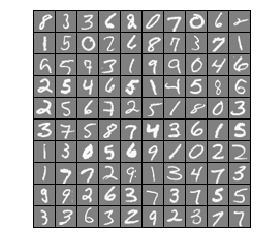

In [1]:
from ex3 import *
## Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                         # (note that we have mapped "0" to label 10)
# Load Training Data
print('Loading and Visualizing Data ...')

from scipy import io as sio
data = sio.loadmat('ex3data1.mat') # training data stored in arrays X, y
X = data['X']
y = data['y'].reshape(-1)
m = X.shape[0]

# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100], :]

%matplotlib inline
_ = displayData(sel)

### ============ Part 2a: Vectorize Logistic Regression ============

In [2]:
# Test case for lrCostFunction
print('Testing lrCostFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])
X_t = np.column_stack([np.ones(5), np.arange(0.1, 1.6, 0.1).reshape((5, 3), order='F')])
y_t = np.array([1, 0, 1, 0, 1]) >= 0.5
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print(f'\nCost: {J:f}')
print('Expected cost: 2.534819')
print('Gradients:')
print(f' {grad} ')
print('Expected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003')

Testing lrCostFunction() with regularization

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 [ 0.146561 -0.548558  0.724722  1.398003] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


### ============ Part 2b: One-vs-All Training ============

In [3]:
print('Training One-vs-All Logistic Regression...')

lambda_ = 1
all_theta = oneVsAll(X, y, num_labels, lambda_)

Training One-vs-All Logistic Regression...
Optimization terminated successfully.
         Current function value: 0.026960
         Iterations: 63
         Function evaluations: 218
         Gradient evaluations: 218
Optimization terminated successfully.
         Current function value: 0.068445
         Iterations: 96
         Function evaluations: 278
         Gradient evaluations: 278
Optimization terminated successfully.
         Current function value: 0.071707
         Iterations: 108
         Function evaluations: 292
         Gradient evaluations: 292
Optimization terminated successfully.
         Current function value: 0.052051
         Iterations: 84
         Function evaluations: 255
         Gradient evaluations: 255
Optimization terminated successfully.
         Current function value: 0.076859
         Iterations: 121
         Function evaluations: 332
         Gradient evaluations: 332
Optimization terminated successfully.
         Current function value: 0.034787
     

好了，应该都收敛了。

### ================ Part 3: Predict for One-Vs-All ================

In [4]:
pred = predictOneVsAll(all_theta, X)

print(f'Training Set Accuracy: {(pred == y).mean() * 100:f}')

Training Set Accuracy: 94.460000


结果有点小误差，应该是$\lambda$取值问题。
###### 以上部分代码在[ex3.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex3/ex3.py)中

## Exercise 3 | Part 2: Neural Networks
### =========== Part 1: Loading and Visualizing Data =============

Loading and Visualizing Data ...


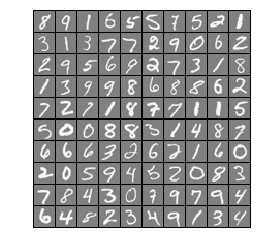

In [5]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                         # (note that we have mapped "0" to label 10)
# Load Training Data
print('Loading and Visualizing Data ...')

from scipy import io as sio
data = sio.loadmat('ex3data1.mat')
X = data['X']
y = data['y'].reshape(-1)
m = X.shape[0]

# Randomly select 100 data points to display
sel = np.random.permutation(m)
sel = sel[:100]

%matplotlib inline
_ = displayData(X[sel, :])

### ================ Part 2: Loading Pameters ================

In [6]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
data = sio.loadmat('ex3weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print(Theta1.shape, Theta2.shape)

Loading Saved Neural Network Parameters ...
(25, 401) (10, 26)


### ================= Part 3: Implement Predict =================

In [7]:
pred = predict(Theta1, Theta2, X);

print(f'Training Set Accuracy: {(pred == y).mean() * 100:f}')

Training Set Accuracy: 97.520000


Displayed image:

Displaying Example Image


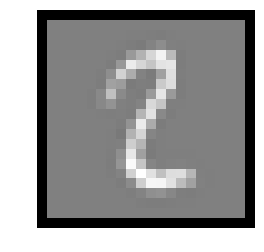


Neural Network Prediction: [2] (digit [2])
Paused - press enter to continue, q to exit:
Displaying Example Image


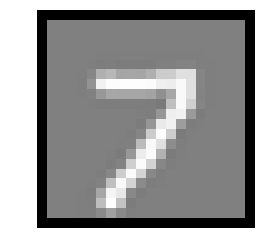


Neural Network Prediction: [7] (digit [7])
Paused - press enter to continue, q to exit:
Displaying Example Image


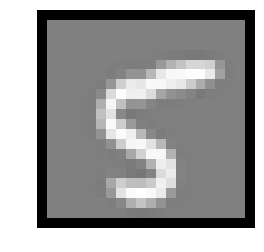


Neural Network Prediction: [5] (digit [5])
Paused - press enter to continue, q to exit:
Displaying Example Image


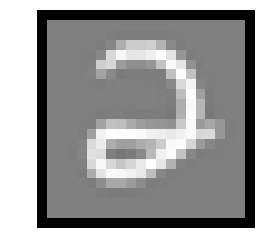


Neural Network Prediction: [2] (digit [2])
Paused - press enter to continue, q to exit:q


In [8]:
#  Randomly permute examples
rp = np.random.permutation(m)

for i in range(m):
    # Display 
    print('Displaying Example Image')
    _ = displayData(X[rp[i], :].reshape((-1, input_layer_size)))

    pred = predict(Theta1, Theta2, X[rp[i], :].reshape((-1, input_layer_size)))
    print(f'\nNeural Network Prediction: {pred} (digit {pred % 10})')
    
    # Pause with quit option
    s = input('Paused - press enter to continue, q to exit:')
    if s == 'q':
        break

嗯，几个例子还是可以的。

### 总结：学会了`scipy.io.loadmat`导入`*.mat`数据的方法，学会了`matplotlib`将矩阵数据画成图的方法。进一步了解`scipy.optimize.minimize`的用法，其可以使用多种迭代方法。